> **TASK-2: MOVIE RATING PREDICTION:**


---Author: Akshata Athani

---Batch: July-2025

---Domain: Data Science

---Aim: Build a model that predicts the rating of a movie based on features like genre,director,and actors.

# **IMPORTING IMPORTANT LIBRARIES**

In [ ]:
# import Libraries for data processing and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding="latin1")
df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.dropna(subset=['Rating'], inplace=True)

In [ ]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'], inplace=True)

In [ ]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), object(9)
memory usage: 649.5+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(7558, 10)

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
# Dataset frist Look
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [ ]:
top_movies= df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
print(top_movies)

                      Name    Year Duration                         Genre  \
8339       Love Qubool Hai  (2020)   94 min                Drama, Romance   
5410            Half Songs  (2021)   79 min                Music, Romance   
2563                 Breed  (2020)      NaN                         Drama   
5077          Gho Gho Rani  (2019)  105 min              History, Romance   
14222  The Reluctant Crime  (2020)  113 min                         Drama   
6852                  June  (2021)   93 min                         Drama   
9105                 Meher  (2020)      NaN                         Drama   
13231           Sindhustan  (2019)   64 min  Documentary, Family, History   
1314          Ashok Vatika  (2018)   97 min                         Drama   
1729              Baikunth  (2021)   72 min                        Family   

       Rating Votes         Director            Actor 1          Actor 2  \
8339     10.0     5  Saif Ali Sayeed          Ahaan Jha   Mahesh Narayan   


# **Visulazing the Preprocessed data**

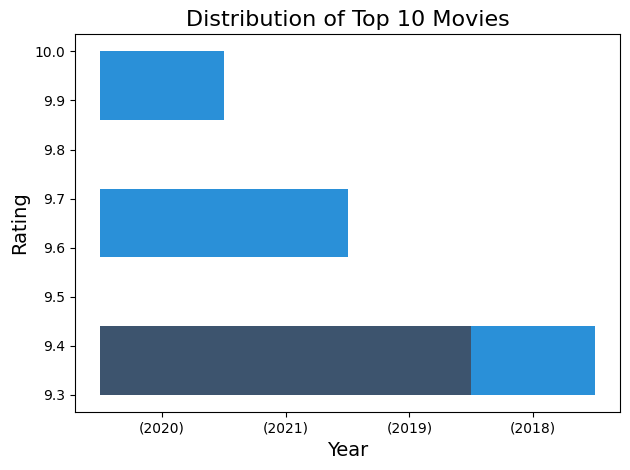

In [ ]:
sns.histplot(data=top_movies, x='Year', y='Rating', multiple='stack')
plt.title('Distribution of Top 10 Movies',fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
year = px.histogram(df, x='Year', histnorm='probability density', nbins= 40)

year.show()

In [ ]:
# Gruop data by year and calculate the average rating
avg_rating_by_year = df.groupby(['Year','Genre'])['Rating'].mean().reset_index()

In [ ]:
# Get the Top 10 genres
top_genres= df['Genre'].value_counts().head(10).index

In [ ]:
# filter the data to include only the top 3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

In [ ]:
# create the line plot with plotly Express
fig = px.scatter(avg_rating_by_year, x='Year', y='Rating', color ='Genre')

In [ ]:
# updating the details into chart like title
fig.update_layout(title='Average Rating by for Top Genres', xaxis_title='Year', yaxis_title='Average Rating')

# show the plot
fig.show()

In [ ]:
# Counts genres occurrences
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

top_n_genres = genre_counts.head(5)


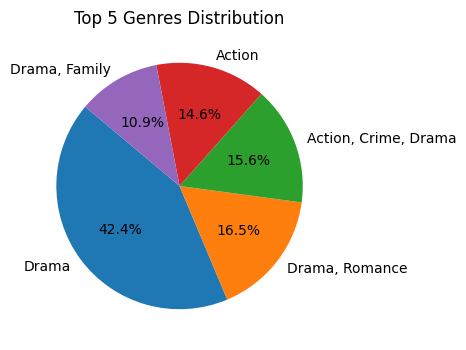

In [ ]:
# Plot pie chart
plt.figure(figsize=[4,4])
plt.pie(top_n_genres ['Count'], labels= top_n_genres['Genre'],autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Genres Distribution')
plt.show()

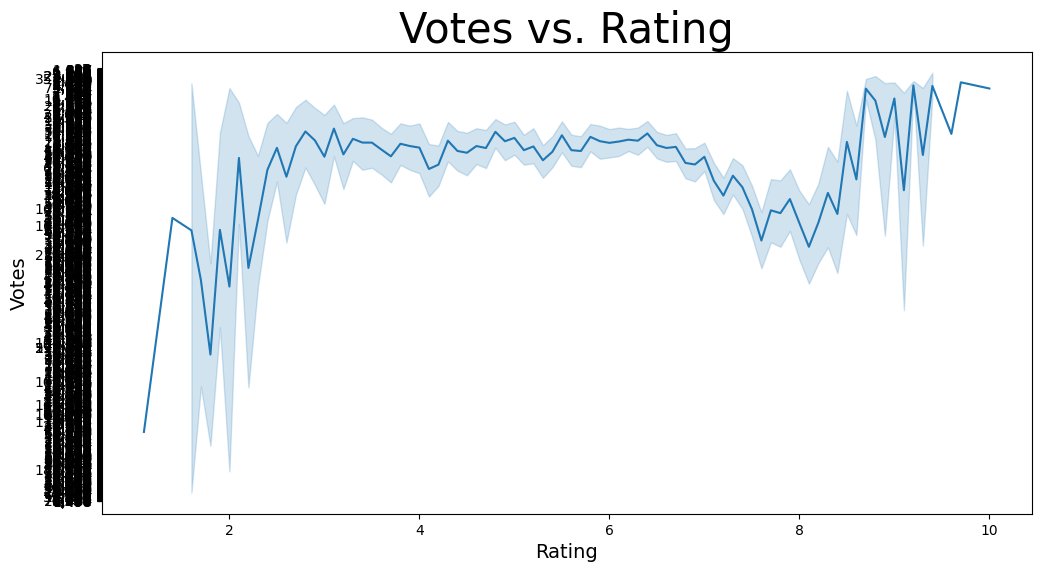

In [ ]:
plt.figure(figsize=[12,6])
sns.lineplot(data=df, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=30)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)
plt.show()

# **Feature Engineering**

In [ ]:
# importing essential libraries for model building
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# dropping name columns because it doesn't impact the outcome
df.drop('Name', axis =1, inplace=True)

In [ ]:
genre_mean_rating=df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating']=genre_mean_rating

director_mean_rating=df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded']=director_mean_rating

actor1_mean_rating=df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded']=actor1_mean_rating

actor2_mean_rating=df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded']=actor2_mean_rating

actor3_mean_rating=df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded']=actor3_mean_rating


In [ ]:
# Keeping the predictor and target variable
X = df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df ['Rating']

# **Model Buliding**

In [ ]:
# importing essential libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Load dataset
df = pd.read_csv('IMDb Movies India.csv', encoding="latin1") # Replace with your actual file name


In [ ]:
# Drop missing values
df.dropna(inplace=True)


In [ ]:
#Convert all string columns to numeric using LabelEncoder
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

#Separate features and target
X = df.drop("Rating", axis=1)      # Replace 'Rating' with your actual target column
y = df["Rating"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

print("Predictions:", y_pred)

Predictions: [5.76932396 6.07514816 5.99572775 ... 5.66112041 5.94740772 6.11453887]


In [ ]:
# Evaluating the performace of model with evaluation metrics
print('The performance evaluation of Logistic Regression is below:', '\n')
print('Mean squared error: ',mean_squared_error(y_test, y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, y_pred))
print('R2 score:',r2_score(y_test, y_pred))


The performance evaluation of Logistic Regression is below: 

Mean squared error:  1.722161516982778
Mean absolute error:  1.05762763583997
R2 score: 0.06997843865652542


# **Model Tesing**

In [ ]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,88,1843,9,6.415521,7.000000,6.850000,7.000000,7.000000
3,88,1164,10,5.716822,4.400000,5.420000,4.400000,4.450000
5,66,1892,47,6.242222,5.313333,4.788889,5.786667,5.872727
6,74,34,42,6.820000,7.383333,5.435000,6.933333,6.500000
8,81,1133,156,5.477778,5.600000,5.600000,5.883333,5.600000


In [ ]:
y.head(5)

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
